# Importing Libraries

In [2]:
#Collecting Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data Preprocessing

## Training Image preprocessing

In [4]:
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# training_set = train_datagen.flow_from_directory(
#                 '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',target_size=(64,64),batch_size=32,class_mode='categorical')

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3145 files belonging to 36 classes.


## Test Image preprocessing

In [6]:
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',target_size=(64,64),batch_size=32,class_mode='categorical')

In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building Model

In [8]:
cnn = tf.keras.models.Sequential()

## Building Convolution layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

## Compiling and Training Phase

In [15]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
training_history = cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
99/99 [==============================] - 114s 1s/step - loss: 9.5404 - accuracy: 0.0385 - val_loss: 3.5294 - val_accuracy: 0.0855
Epoch 2/30
99/99 [==============================] - 114s 1s/step - loss: 3.8935 - accuracy: 0.0645 - val_loss: 3.4519 - val_accuracy: 0.1140
Epoch 3/30
99/99 [==============================] - 119s 1s/step - loss: 3.6821 - accuracy: 0.0941 - val_loss: 3.1617 - val_accuracy: 0.2422
Epoch 4/30
99/99 [==============================] - 115s 1s/step - loss: 3.8920 - accuracy: 0.1402 - val_loss: 2.8307 - val_accuracy: 0.3390
Epoch 5/30
99/99 [==============================] - 109s 1s/step - loss: 3.4409 - accuracy: 0.1965 - val_loss: 2.8508 - val_accuracy: 0.2849
Epoch 6/30
99/99 [==============================] - 109s 1s/step - loss: 2.9838 - accuracy: 0.2499 - val_loss: 9.7134 - val_accuracy: 0.1709
Epoch 7/30
99/99 [==============================] - 112s 1s/step - loss: 2.7794 - accuracy: 0.3246 - val_loss: 2.1015 - val_accuracy: 0.5385
Epoch 8/30
99

## Saving Model

In [17]:
cnn.save("trained_model.h5")

In [22]:
#Recording History
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [18]:
training_history.history

{'loss': [9.540384292602539,
  3.893489360809326,
  3.682084321975708,
  3.891995668411255,
  3.4409213066101074,
  2.983830451965332,
  2.779435873031616,
  2.4667694568634033,
  2.625107765197754,
  2.545518636703491,
  2.0875699520111084,
  2.1245787143707275,
  2.681596517562866,
  1.9427392482757568,
  1.69363272190094,
  1.5967098474502563,
  1.7817137241363525,
  1.3353188037872314,
  1.4733896255493164,
  1.3500674962997437,
  1.2133033275604248,
  1.271291732788086,
  1.2122368812561035,
  1.1074169874191284,
  1.1579723358154297,
  1.0286403894424438,
  1.059586763381958,
  1.1621503829956055,
  1.0446745157241821,
  0.9915093183517456],
 'accuracy': [0.038473766297101974,
  0.06454689800739288,
  0.0941176488995552,
  0.14022257924079895,
  0.19650238752365112,
  0.24992050230503082,
  0.3246423006057739,
  0.3796502351760864,
  0.4308426082134247,
  0.47885531187057495,
  0.5354530811309814,
  0.5503974556922913,
  0.5659777522087097,
  0.5825119018554688,
  0.6451510190963

In [19]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Calculating Accuracy of Model Achieved on Test set

In [20]:
print('Test set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))

Test set Accuracy: 90.31339287757874 %


# Accuracy Visualization

## Training Visualization

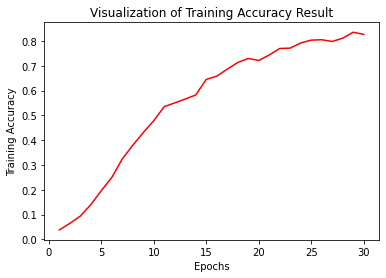

In [23]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

## Validation Visualization

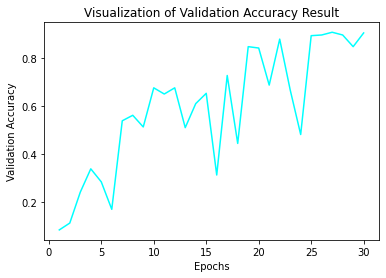

In [24]:
plt.plot(epochs,training_history.history['val_accuracy'],color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Visualization of Validation Accuracy Result")
plt.show()